# 521153S Deep Learning assignment 3: Dataset and Convolutional Neural Networks



This assignment is designed by Shuzhou Sun.

## Outline 
#### In this assignment, you will learn:
* Writing customer dataset in Pytorch with training, validation and testing data.
* Building a Convolutional Neural Network (CNN) in Pytorch.
* Training and testing your CNN in Pytorch.

#### Tasks (<span style="color:green">15 points or more</span>)
* **Part 1.** Writing a customer dataset based on Fashion-MNIST
    * 1.1. Define a Dataset class (<span style="color:green">2 points</span>)
    * 1.2. Dataset checking (<span style="color:green">2.5 points</span>)
    * 1.3. Iterating through the dataset with batches (<span style="color:green">1 points</span>)<br>
* **Part 2.** Build a CNN on your own. (<span style="color:green">3.5 points</span>) <br>
* **Part 3.** Train and test your CNN. (<span style="color:green">6 points or more</span>)
    * 3.1. Create functions for train and evaluation (<span style="color:green">2.5 points</span>) <br>
    * 3.2. Train and test your network (<span style="color:green">1.5 point</span>) <br>
    * 3.3. Modification for your training (<span style="color:green">1 point or more</span>) <br>
    * Question: give your ideas to accelerate your training process (<span style="color:green">1 points or more</span>)


#### Environment
Python 3, Numpy, matplotlib, torch, torchvision

#### Dataset
* [**Fashion-MNIST**](https://github.com/zalandoresearch/fashion-mnist)
is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Here we are to split the 60,000 images in the predefined training set into a new training set with 50,000 images and a validation set with 10,000 images. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training, validation and testing splits. Using the Fashion-MNIST give you more room to wiggle your experiments.

#### Hints
* To find the place where you have to insert your solution, hit Crtl + F and search for **TODO:** . You are not supposed to modify the codes from other parts.
* Be careful with the shapes of the tensors flowing through the CNN model, making all the operations have compatible inputs and outputs. 

## Part 1. Writing a customer dataset based on Fashion-MNIST (<span style="color:green">5.5 points</span>)

### Part 1.1. Define a Dataset class (<span style="color:green">2 points</span>)

In [16]:
# import necessary packages
import os 
import torch 
import requests, zipfile, sys
import numpy as np
import matplotlib.pyplot as plt 
from torch.utils.data import Dataset, DataLoader
import torchvision
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms


# fashion_MNIST dataset 
data_dir='./data/fashion_mnist_npy/'
train_data = np.load(os.path.join(data_dir, 'train_data.npy'))
test_data = np.load(os.path.join(data_dir, 'test_data.npy'))
train_label = np.load(os.path.join(data_dir, 'train_labels.npy'))
test_label = np.load(os.path.join(data_dir, 'test_labels.npy'))

# split the training data to a new training data and validation data
class_indices = [[] for i in range(10)]
for i, v in enumerate(train_label):
    class_indices[v].append(i)

indices_all = np.random.permutation(len(class_indices[0]))
# take the first 1000 indices of indices_all
indices = indices_all[:1000]
# take the rest of the indices of indices_all
indices_rest = indices_all[1000:]

valid_indices = []
train_indices = []
for i in range(10):
    # build indices for validation set
    # TODO: build indices for training set (0.25 points)
    valid_indices.extend(np.array(class_indices[i])[indices])
    train_indices.extend(np.array(class_indices[i])[indices_rest]) 

# write the customer dataset based on the dataset
class FashionMnist(Dataset):
    """Fashion Mnist dataset""" 

    def __init__(self, phase='train', transform=None):

        # TODO: now, split the predefined training data (1.5 points)
        if 'train' == phase:
            # your code here
            self.data = train_data[train_indices]
            self.label = train_label[train_indices]
        elif 'valid' == phase:
            # your code here 
            self.data = train_data[valid_indices]
            self.label = train_label[valid_indices]
        elif 'test' == phase:
            # your code here
            self.data = test_data
            self.label = test_label
        else:
            assert True, 'wrong phase'
            

        self.transform = transform 
        
        self.label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        
        # TODO: get image and label according to the index (0.25 points)
        # your code here 
        img, label = self.data[index], self.label[index]

        # doing this so that it is consistent with all other datasets
        # to return a PIL Image
        img = Image.fromarray(img, mode='L')

        if self.transform is not None:
            img = self.transform(img)

        return img, label

### Part 1.2. Dataset checking (<span style="color:green">2.5 points</span>)
First, randomly show some images in training, validation and testing data and check if the images have correct labels.<br>
Secondly, check the number of images for each class, to make sure the dataset created correctly.

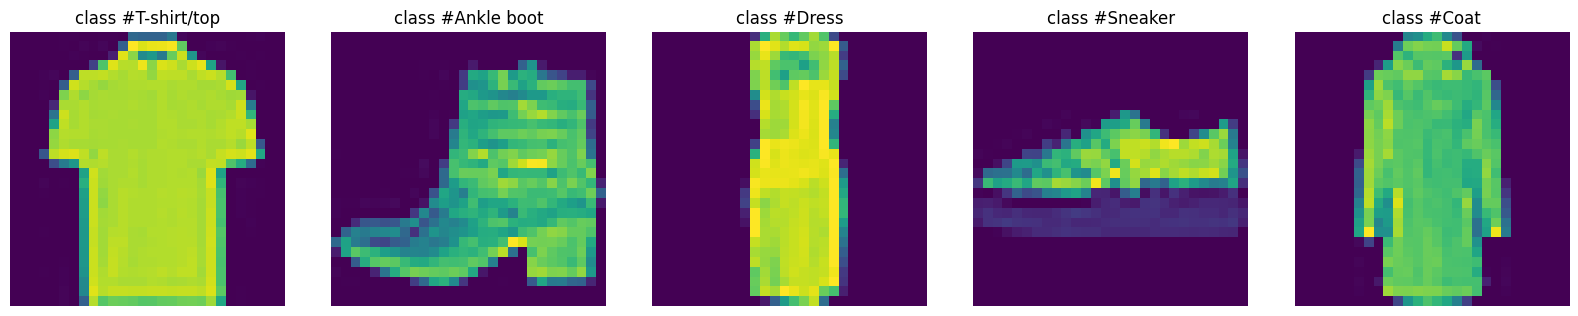

total number of training set: 50000
numer of images for class T-shirt/top: 5000
numer of images for class Trouser: 5000
numer of images for class Pullover: 5000
numer of images for class Dress: 5000
numer of images for class Coat: 5000
numer of images for class Sandal: 5000
numer of images for class Shirt: 5000
numer of images for class Sneaker: 5000
numer of images for class Bag: 5000
numer of images for class Ankle boot: 5000


In [17]:
# checking training set
# randomly show some samples and their labels
# TODO: create a FashionMnist dataset for training, set transform to None (0.5 points)
# your code here
train_set =  FashionMnist()#this is the first 0.25 points, see the rest 0.25 points in Part 1.3

num_to_show = 5
idx = np.random.choice(range(len(train_set)), num_to_show, replace=False) # randomly pick 5 pictures to show

fig = plt.figure(figsize=(16, 8))

for i in range(len(idx)):
    image, label = train_set[idx[i]]
    label_name = train_set.label_names[label]

    ax = plt.subplot(1, num_to_show, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label_name))
    ax.axis('off')
    plt.imshow(np.asarray(image))

plt.show()

# print number of images for each class
print('total number of training set: {}'.format(len(train_set)))
for i in range(10):
    print('numer of images for class {}: {}'.format(train_set.label_names[i], np.sum(train_set.label==i)))

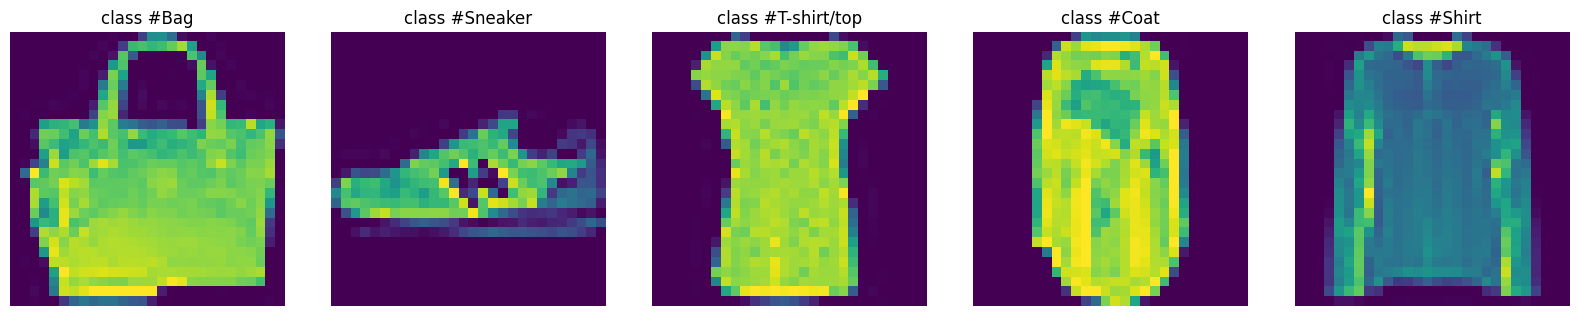

total number of training set: 10000
numer of images for class T-shirt/top: 1000
numer of images for class Trouser: 1000
numer of images for class Pullover: 1000
numer of images for class Dress: 1000
numer of images for class Coat: 1000
numer of images for class Sandal: 1000
numer of images for class Shirt: 1000
numer of images for class Sneaker: 1000
numer of images for class Bag: 1000
numer of images for class Ankle boot: 1000


In [18]:
# TODO:checking validation data (1 points)
# your code here, like the training set, the output in this section should be like this (you can have your own visualization style)
validation_set = FashionMnist(phase="valid")

num_to_show = 5
idx = np.random.choice(range(len(validation_set)), num_to_show, replace=False) # randomly pick 5 pictures to show

fig = plt.figure(figsize=(16, 8))

for i in range(len(idx)):
    image, label = validation_set[idx[i]]
    label_name = validation_set.label_names[label]

    ax = plt.subplot(1, num_to_show, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label_name))
    ax.axis('off')
    plt.imshow(np.asarray(image))

plt.show()

# print number of images for each class
print('total number of training set: {}'.format(len(validation_set)))
for i in range(10):
    print('numer of images for class {}: {}'.format(validation_set.label_names[i], np.sum(validation_set.label==i)))

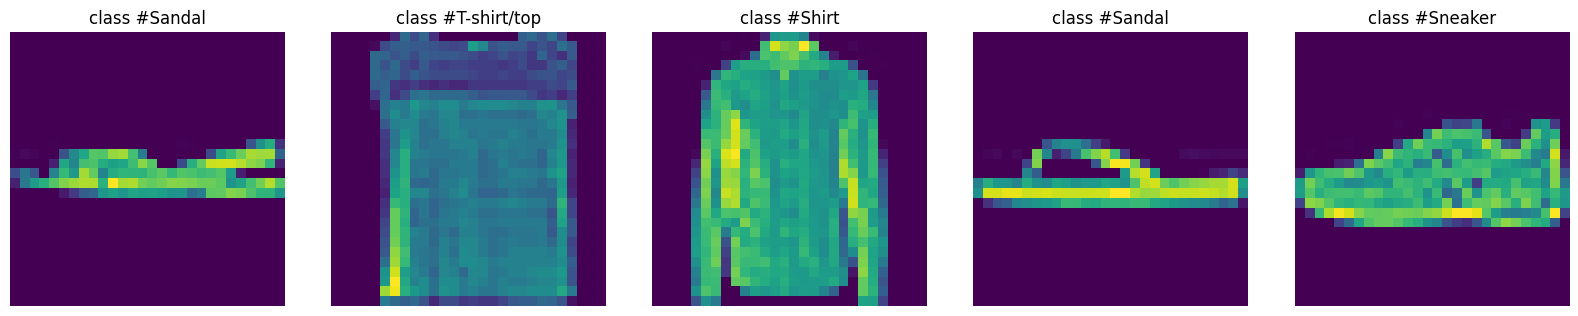

total number of training set: 10000
numer of images for class T-shirt/top: 1000
numer of images for class Trouser: 1000
numer of images for class Pullover: 1000
numer of images for class Dress: 1000
numer of images for class Coat: 1000
numer of images for class Sandal: 1000
numer of images for class Shirt: 1000
numer of images for class Sneaker: 1000
numer of images for class Bag: 1000
numer of images for class Ankle boot: 1000


In [19]:
# TODO: checking testing data (1 points)
# your code here
test_set = FashionMnist(phase="test")

num_to_show = 5
idx = np.random.choice(range(len(test_set)), num_to_show, replace=False) # randomly pick 5 pictures to show

fig = plt.figure(figsize=(16, 8))

for i in range(len(idx)):
    image, label = test_set[idx[i]]
    label_name = test_set.label_names[label]

    ax = plt.subplot(1, num_to_show, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label_name))
    ax.axis('off')
    plt.imshow(np.asarray(image))

plt.show()

# print number of images for each class
print('total number of training set: {}'.format(len(test_set)))
for i in range(10):
    print('numer of images for class {}: {}'.format(test_set.label_names[i], np.sum(test_set.label==i)))

### Part 1.3. Iterating through the dataset with batches (<span style="color:green">1 points</span>)
Here, we add more features with the help of [DataLoader](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#iterating-through-the-dataset):
* Batching the data
* Shuffling the data
* Load the data in parallel using multiprocessing workers.

`torch.utils.data.DataLoader` is an iterator which provides all these features. Parameters used below should be clear. One parameter of interest is collate_fn. You can specify how exactly the samples need to be batched using collate_fn. However, default collate should work fine for most use cases.

The `DataLoader` takes as input an instance of `FashionMnist` we defined in Part 1.1. Since images in the dataset currently are all in PIL format, we have to convert them to torch.Tensor by using a transform. Actually, `transform` is often used for data augmentation, further illustrations of `transform` can be found in [https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#writing-custom-datasets-dataloaders-and-transforms](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#writing-custom-datasets-dataloaders-and-transforms).

In [20]:
# Set batch_size to 64, shuffling the training set. Number of workers here is set to 0. If your system is Linux, 
# it is possible to try more workers to do multi-process parallel reading.
data_transform = transforms.Compose([transforms.ToTensor()])
train_set =  FashionMnist(transform=data_transform)#the other 0.25 points for create a FashionMnist dataset for training
train_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=0)

# TODO: create test_loader and valid_loader, both with no shuffling (1 points)
valid_set = FashionMnist(phase="valid",transform=data_transform) #the other 0.25 points for create a FashionMnist dataset for training
valid_loader = DataLoader(valid_set, batch_size=64, shuffle=False, num_workers=6)

test_set = FashionMnist(phase="test",transform=data_transform) #the other 0.25 points for create a FashionMnist dataset for training
test_loader = DataLoader(test_set, batch_size=64, shuffle=False, num_workers=6)


## Part 2. Build a CNN on your own (<span style="color:green">3.5 points</span>)
Structure of the CNN (**Conv**: convolutional layer, **BN**: Batch Normalization layer, **Max_Pool**: max pooling layer, **FC**: fully connected layer, batch_size=64):
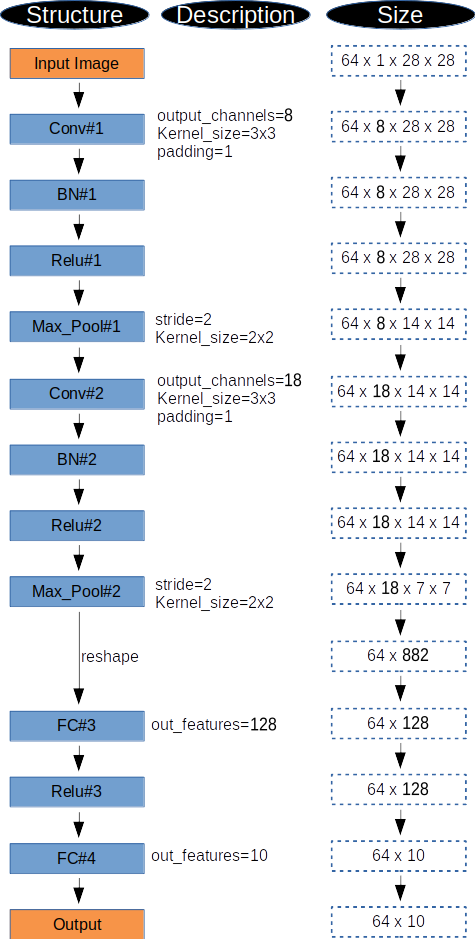

To define your own Network, following the rule of thumb:
1. Define the layers in `__init__`.
2. Do the forward calculation in `forward`.

In [21]:
class Network(nn.Module):
    def __init__(self, num_classes):
        super().__init__() 

        # define layers 
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(8)
        self.relu1 = nn.ReLU()
        self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # TODO: rest of layers (1.5 points)  
        # your code here
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=18, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(18)
        self.relu2 = nn.ReLU()
        self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc3 = nn.Linear(882,128)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(128,10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)     
        x = self.max_pool1(x)
        
        # TODO: fill the rest part, you may need more lines like x = ... (2 points)
        # your code here
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.max_pool2(x)

        x = x.reshape(x.shape[0], -1)

        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)

        return x
    

## Part 3. Train and test your CNN model (<span style="color:green">6 points or more</span>)
### Part 3.1. Create functions for train and evaluation (<span style="color:green">2.5 points</span>)
* Instantiate a network.
* When training, create an optimizer to take care of network's parameters, calculate the loss and accuracy.
* When evaluation, only need to claculate the accuracy.

In [22]:
# instantiate a network
net = Network(num_classes=10)

# evaluation function
def eval(net, data_loader):
    use_cuda = torch.cuda.is_available()
    if use_cuda:
        net = net.cuda()
    net.eval()
    correct = 0.0
    num_images = 0.0
    for i_batch, (images, labels) in enumerate(data_loader):
        if use_cuda:
            images = images.cuda()
            labels = labels.cuda()
        outs = net(images) 
        _, preds = outs.max(1)
        correct += preds.eq(labels).sum()
        num_images += len(labels)

    acc = correct / num_images
    return acc

# training function
def train(net, train_loader, valid_loader, epoches=10, weight_decay=0.0, optimizer="SGD"):
    loss_function = torch.nn.CrossEntropyLoss()
    # TODO: build your SGD optimizer with learning rate=0.01, momentum=0.9, no weight decay (0.5 points)
    # your code here
    if optimizer == "SGD":
        optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9,weight_decay=weight_decay)
    else:
        optimizer = optim.Adam(net.parameters(),weight_decay=weight_decay)

    use_cuda = torch.cuda.is_available()
    if use_cuda:
        net = net.cuda()
    
    for epoch in range(epoches):
        net.train() 
        correct = 0.0 # used to accumulate number of correctly recognized images
        num_images = 0.0 # used to accumulate number of images
        for i_batch, (images, labels) in enumerate(train_loader):
            if use_cuda:
                images = images.cuda()
                labels = labels.cuda()
            # TODO: rest of the training code
            # your code here, including the forward propagation (0.75 points), 
            # backward propagation (0.75 points) and calculating the accuracy (0.5 points)
            net.zero_grad()
            outs = net(images) 
            _, preds = outs.max(1)
            loss = loss_function(outs, labels)
            loss.backward()
            optimizer.step()
            correct += preds.eq(labels).sum()
            num_images += len(labels)

        acc = correct / num_images
        acc_eval = eval(net, valid_loader)
        print('epoch: %d, lr: %f, accuracy: %f, loss: %f, valid accuracy: %f' % (epoch, optimizer.param_groups[0]['lr'], acc, loss.item(), acc_eval))

    return net

### Part 3.2. Train and test your network (<span style="color:green">1.5 points</span>)

In [23]:
print('Please wait patiently, it may take some seconds...')
# TODO: train your network here (0.75 points)
# your code here
train(net,train_loader,valid_loader)

# TODO: test your network here on testing data (0.75 points)
# your code here
acc_test = eval(net,test_loader)
print('accuracy on testing data: %f' % acc_test) #  a reference output is provided below:

Please wait patiently, it may take some seconds...
epoch: 0, lr: 0.010000, accuracy: 0.833920, loss: 0.227689, valid accuracy: 0.871900
epoch: 1, lr: 0.010000, accuracy: 0.885140, loss: 0.159625, valid accuracy: 0.890000
epoch: 2, lr: 0.010000, accuracy: 0.901540, loss: 0.520401, valid accuracy: 0.896900
epoch: 3, lr: 0.010000, accuracy: 0.910420, loss: 0.133979, valid accuracy: 0.898800
epoch: 4, lr: 0.010000, accuracy: 0.917180, loss: 0.052092, valid accuracy: 0.890100
epoch: 5, lr: 0.010000, accuracy: 0.922220, loss: 0.085997, valid accuracy: 0.910900
epoch: 6, lr: 0.010000, accuracy: 0.928440, loss: 0.232100, valid accuracy: 0.911300
epoch: 7, lr: 0.010000, accuracy: 0.934660, loss: 0.281567, valid accuracy: 0.910400
epoch: 8, lr: 0.010000, accuracy: 0.937740, loss: 0.217623, valid accuracy: 0.916900
epoch: 9, lr: 0.010000, accuracy: 0.941260, loss: 0.049345, valid accuracy: 0.912700
accuracy on testing data: 0.900900


### Part 3.3. Modification for your training (<span style="color:green">1 points or more</span>)
Try the following tips to improve your network's performance:
* Weight decay? (Please set a weight penalty in optimizer)
* More epoches? 
* Maybe more convolutinal or fc layers? 
* Maybe use a shortcut in the convoluctional layer? (Refer to this [blog](https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035))

**Note**: Each tip has 0.5 points, more tips used, more points you will get. You could come up with your own tips, and they should be reasonable, persuasive and implemented with your code.

In [24]:
net = Network(num_classes=10)
train(net,train_loader, valid_loader, epoches=25, weight_decay=0.05, optimizer="Adam")

acc_test = eval(net,test_loader)
print('accuracy on testing data: %f' % acc_test)

epoch: 0, lr: 0.001000, accuracy: 0.821400, loss: 0.554582, valid accuracy: 0.840500
epoch: 1, lr: 0.001000, accuracy: 0.839320, loss: 0.382689, valid accuracy: 0.849500
epoch: 2, lr: 0.001000, accuracy: 0.843440, loss: 0.431229, valid accuracy: 0.844800
epoch: 3, lr: 0.001000, accuracy: 0.847000, loss: 0.732224, valid accuracy: 0.857800
epoch: 4, lr: 0.001000, accuracy: 0.849300, loss: 0.655896, valid accuracy: 0.834700
epoch: 5, lr: 0.001000, accuracy: 0.850780, loss: 0.799030, valid accuracy: 0.852700
epoch: 6, lr: 0.001000, accuracy: 0.853360, loss: 0.545553, valid accuracy: 0.854700
epoch: 7, lr: 0.001000, accuracy: 0.854620, loss: 0.297296, valid accuracy: 0.856100
epoch: 8, lr: 0.001000, accuracy: 0.856380, loss: 0.434034, valid accuracy: 0.843100
epoch: 9, lr: 0.001000, accuracy: 0.856660, loss: 0.364638, valid accuracy: 0.846500
epoch: 10, lr: 0.001000, accuracy: 0.859420, loss: 0.486619, valid accuracy: 0.849500
epoch: 11, lr: 0.001000, accuracy: 0.859780, loss: 0.376286, val

###  Question: give your ideas to accelerate your training process (<span style="color:green">1 points or more</span>)
#### Your answer: (the first two is 0.5 points each, the rest is 0.25 points each. More ideas, more points, with the upper limit 2 points in total. Please also describe your idea at least for couple of sentences as the ideas should be reasonable and persuasive.)

1. Using a specific servers or machines whith powerful GPU

2. Changing the optimizer and using SGD optimizer.

3. Changing the network could help.